In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import pickle as pkl
from collections import Counter
import sys, os
sys.path.insert(0, os.path.abspath(".."))

In [3]:
with open("../data/reduced_games.pkl","rb") as f:
    games=pkl.load(f)
with open("../data/tf_idf.pkl","rb") as f2:
    tfidf_pd=pkl.load(f2)

In [3]:
games

,app_id,title,price_final,description,tags
0,13500,Prince of Persia: Warrior Within™,9.99,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,113020,Monaco: What's Yours Is Mine,14.99,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
2,226560,Escape Dead Island,14.99,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
3,249050,Dungeon of the ENDLESS™,11.99,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
4,250180,METAL SLUG 3,7.99,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
...,...,...,...,...,...
9995,1588380,Blaster Master Zero 3,14.99,The Pinnacle of Mutant Blasting Action Is Here...,"[Action, Adventure, Metroidvania, Exploration,..."
9996,1636000,Tybot Invasion: The Typing Runner,1.99,"Type words quickly to destroy robots, move amo...","[Typing, Runner, Spelling, On-Rails Shooter, S..."
9997,1669420,Islets,19.99,Take to the sky and reunite a fragmented world...,"[Metroidvania, Adventure, Atmospheric, Platfor..."
9998,1693040,Synthwave Burnout,9.99,The lost highway awaits you to take you beyond...,"[Action, Racing, Sports, Rhythm, 3D, Colorful,..."


In [3]:
tfidf_pd

,abandon,abil,abl,aboard,abov,abstract,absurd,abyss,academi,access,...,youll need,young,young girl,young man,youv,yuri,zero,zombi,zombi surviv,zone
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.276294,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.235272,0.000000,0.0,0.0
9996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
9997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
9998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.112768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


PCA

In [4]:
pca=PCA(n_components=1300)
pca_matrix=pca.fit_transform(tfidf_pd.to_numpy())

Cosine similarity KNN

In [5]:
sim=cosine_similarity(pca_matrix)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [7]:
"""with open("../data/sim_matrix.pkl","wb") as f:
    pkl.dump(sim,f)"""

In [6]:
def recommend(game_name):
    index=games[games["title"]==game_name].index[0]
    top_rec=sorted(list(enumerate(sim[index])),key=lambda x:x[1],reverse=True)
    for candidate in top_rec[1:11]:
        print(games.iloc[candidate[0]].title)

In [7]:
from fuzzywuzzy import process
def games_title_match(name):
    all_title=games["title"].to_list()
    match_title=process.extract(name,all_title,limit=5)
    return match_title

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [9]:
name="dragon ball"
title_list=games_title_match(name)
title_list

[('DRAGON BALL FighterZ', 90),
 ('SUPER DRAGON BALL HEROES WORLD MISSION', 90),
 ('DRAGON BALL XENOVERSE', 90),
 ('Ukrainian ball in search of gas', 86),
 ('Dragon Age™ Inquisition', 86)]

In [10]:
title=title_list[1][0]
print(games[games["title"]==title].tags)
recommend(title)

9320    [Strategy, Card Game, Card Battler, Anime, Mul...
Name: tags, dtype: object
Yu-Gi-Oh! Legacy of the Duelist : Link Evolution
Eternal Card Game
Eternal Destiny
GWENT: The Witcher Card Game
Card City Nights 2
Yomi
cheesequest
Erannorth Chronicles
卡牌缔造者-CardMaker
Astral Towers


KMeans

In [5]:
feature_name=list(tfidf_pd.columns)

In [6]:
sc=[]
cluster_num=range(50,71)
for k in cluster_num:
    km=KMeans(n_clusters=k,max_iter=300,init="k-means++",random_state=5).fit(pca_matrix)
    sc.append(silhouette_score(tfidf_pd,km.labels_))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

In [43]:
sc

[0.026769301463279112,
 0.02638854088484599,
 0.024375535195190895,
 0.022902627046310443,
 0.023901272676087326,
 0.025275425641542337]

Text(0.5, 1.0, 'KMEAN')

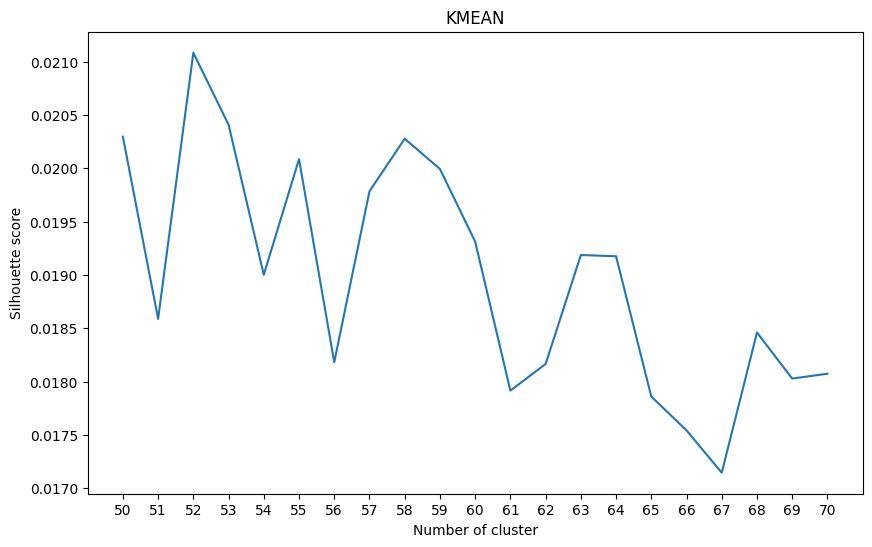

In [7]:
plt.figure(figsize=(10,6))
plt.plot(cluster_num,sc)
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.xticks(cluster_num)
plt.title("KMEAN")

In [7]:
km=KMeans(n_clusters=65,max_iter=300,init="k-means++",random_state=5).fit(pca_matrix)
print(silhouette_score(pca_matrix,km.labels_))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


0.02725508778573509


Get topic of each cluster

In [17]:
top_terms={}
print("Top terms per cluster:")
original_centroids = pca.inverse_transform(km.cluster_centers_)
order_centroids = original_centroids.argsort()[:, ::-1] 
for i in range(km.n_clusters):
    top_terms[i]=", ".join([feature_name[ind] for ind in order_centroids[i, :10]])
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % feature_name[ind],end=", ")
    print("")

Top terms per cluster:
Cluster 0:
 chines,  avail,  game onli,  rpg,  martial,  martial art,  drama,  onli,  rich turnbas,  art, 
Cluster 1:
 rpg,  action rpg,  action,  fantasi,  rpg action,  world,  slash,  hack slash,  hack,  adventur, 
Cluster 2:
 puzzl,  puzzl game,  logic,  game,  casual,  indi puzzl,  program,  casual indi,  casual puzzl,  solv, 
Cluster 3:
 sexual,  sexual content,  content,  nuditi,  hentai,  matur,  anim,  nsfw,  content nuditi,  femal, 
Cluster 4:
 horror,  surviv,  surviv horror,  psycholog,  psycholog horror,  firstperson,  dark,  horror surviv,  atmospher,  coop, 
Cluster 5:
 war,  world war,  ii,  war ii,  world,  strategi,  tactic,  histor,  wargam,  militari, 
Cluster 6:
 card,  card game,  deckbuild,  game,  turnbas,  battler,  card battler,  strategi,  roguelik,  roguelik deckbuild, 
Cluster 7:
 roguelik,  generat,  procedur,  procedur generat,  roguelit,  death,  action roguelik,  perma,  perma death,  action, 
Cluster 8:
 platform,  precis,  precis

In [14]:
top_terms

{'0': 'chines, avail, game onli, rpg, martial, martial art, drama, onli, rich turnbas, art',
 '1': 'rpg, action rpg, action, fantasi, rpg action, world, slash, hack slash, hack, adventur',
 '2': 'puzzl, puzzl game, logic, game, casual, indi puzzl, program, casual indi, casual puzzl, solv',
 '3': 'sexual, sexual content, content, nuditi, hentai, matur, anim, nsfw, content nuditi, femal',
 '4': 'horror, surviv, surviv horror, psycholog, psycholog horror, firstperson, dark, horror surviv, atmospher, coop',
 '5': 'war, world war, ii, war ii, world, strategi, tactic, histor, wargam, militari',
 '6': 'card, card game, deckbuild, game, turnbas, battler, card battler, strategi, roguelik, roguelik deckbuild',
 '7': 'roguelik, generat, procedur, procedur generat, roguelit, death, action roguelik, perma, perma death, action',
 '8': 'platform, precis, precis platform, platform platform, difficult, action, retro, platform difficult, control, graphic',
 '9': 'sport, race, simul, multiplay, bike, mot

In [11]:
sorted_counts = sorted(Counter(km.labels_).items(), key=lambda x:x[1],reverse=True)
sorted_counts

[(26, 496),
 (34, 458),
 (42, 287),
 (29, 274),
 (18, 273),
 (3, 264),
 (30, 261),
 (1, 249),
 (4, 244),
 (11, 220),
 (52, 219),
 (17, 210),
 (53, 206),
 (27, 195),
 (39, 192),
 (59, 192),
 (14, 189),
 (63, 189),
 (46, 183),
 (2, 181),
 (24, 181),
 (6, 181),
 (15, 173),
 (13, 164),
 (45, 161),
 (5, 159),
 (43, 157),
 (58, 153),
 (61, 147),
 (36, 144),
 (57, 143),
 (12, 142),
 (49, 136),
 (21, 135),
 (50, 135),
 (51, 134),
 (16, 134),
 (28, 130),
 (35, 129),
 (44, 129),
 (64, 127),
 (9, 125),
 (7, 121),
 (32, 117),
 (20, 113),
 (8, 113),
 (40, 111),
 (22, 106),
 (56, 104),
 (47, 96),
 (38, 89),
 (54, 86),
 (48, 85),
 (41, 85),
 (37, 82),
 (10, 74),
 (62, 71),
 (19, 68),
 (55, 60),
 (60, 50),
 (33, 50),
 (31, 48),
 (25, 35),
 (23, 21),
 (0, 14)]

In [18]:
summary=games.copy()

In [19]:
sil_samples=silhouette_samples(pca_matrix,km.labels_)
summary["cluster"]=km.labels_.tolist()
summary["silhouette_score"]=sil_samples
summary["top_terms"]=[top_terms[summary.loc[i].cluster] for i in range(summary.shape[0])]

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [23]:
summary

,app_id,title,price_final,description,tags,cluster,silhouette_score,top_terms
0,13500,Prince of Persia: Warrior Within™,9.99,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",35,0.007529,"slash, hack, hack slash, action, beat, beat em..."
1,113020,Monaco: What's Yours Is Mine,14.99,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",53,0.023476,"coop, local, local coop, multiplay, local mult..."
2,226560,Escape Dead Island,14.99,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",62,0.021579,"zombi, surviv, shooter, horror, action, postap..."
3,249050,Dungeon of the ENDLESS™,11.99,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",7,0.026760,"roguelik, generat, procedur, procedur generat,..."
4,250180,METAL SLUG 3,7.99,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller...",39,-0.030668,"pixel, graphic, retro, pixel graphic, arcad, p..."
...,...,...,...,...,...,...,...,...
9995,1588380,Blaster Master Zero 3,14.99,The Pinnacle of Mutant Blasting Action Is Here...,"[Action, Adventure, Metroidvania, Exploration,...",49,0.034126,"metroidvania, platform, scroller, explor, acti..."
9996,1636000,Tybot Invasion: The Typing Runner,1.99,"Type words quickly to destroy robots, move amo...","[Typing, Runner, Spelling, On-Rails Shooter, S...",38,-0.023420,"match, score, puzzl, arcad, casual, addict, sc..."
9997,1669420,Islets,19.99,Take to the sky and reunite a fragmented world...,"[Metroidvania, Adventure, Atmospheric, Platfor...",49,0.035815,"metroidvania, platform, scroller, explor, acti..."
9998,1693040,Synthwave Burnout,9.99,The lost highway awaits you to take you beyond...,"[Action, Racing, Sports, Rhythm, 3D, Colorful,...",22,0.019928,"music, rhythm, vr, soundtrack, rhythm music, r..."


In [34]:
c=summary[summary["title"]=="Osylla"].cluster.item()
c

29

In [35]:
summary[summary["cluster"]==c]["app_id"].to_list()

[433550,
 298930,
 402260,
 529590,
 962630,
 1911560,
 979400,
 1512390,
 596000,
 1532460,
 1273260,
 1714440,
 400790,
 343710,
 368430,
 725780,
 964350,
 1228520,
 384110,
 388880,
 753930,
 1983330,
 1705930,
 27000,
 1924710,
 524850,
 932220,
 1293160,
 1876830,
 1249880,
 2064580,
 1304640,
 1437500,
 251850,
 1575450,
 546080,
 629000,
 1239050,
 1336210,
 1810960,
 2067570,
 897030,
 558420,
 1094030,
 2110510,
 362680,
 1241510,
 766730,
 1711420,
 558450,
 603810,
 1044340,
 1459910,
 1504740,
 1458560,
 1946310,
 440420,
 960980,
 1178490,
 513290,
 1321230,
 593960,
 692100,
 1000700,
 2180750,
 889280,
 1808060,
 1469370,
 429720,
 567380,
 736570,
 1131740,
 769970,
 1838340,
 426310,
 1322300,
 364390,
 747360,
 1130620,
 1335560,
 1549440,
 1817290,
 510590,
 906100,
 299950,
 629220,
 1294230,
 342260,
 1003360,
 1652680,
 340990,
 1195910,
 1409640,
 791770,
 1306750,
 821500,
 1066140,
 1594340,
 380150,
 1611490,
 428860,
 1718130,
 2017370,
 1857650,
 535460,
 6

In [27]:
"""with open("../data/reduced_games_with_clusters.pkl","wb") as f:
    pkl.dump(summary,f)"""

<Axes: >

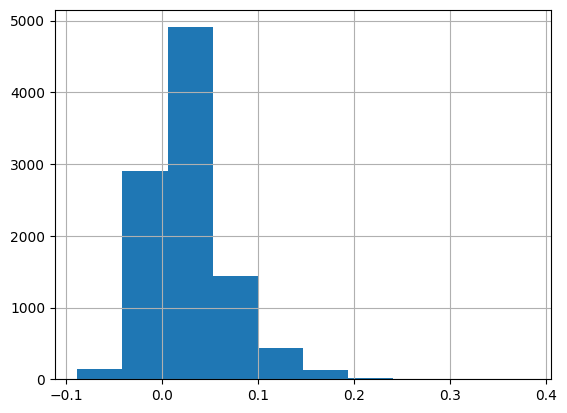

In [21]:
summary["silhouette_score"].hist()

In [1]:
summary.groupby("app_id")[summary["silhouette_score"]<0].count()

NameError: name 'summary' is not defined